In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# For text processing and machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# For saving and loading the model
import joblib


In [35]:
# Load the dataset
df = pd.read_csv(r'C:\Users\anshi\IMDB Dataset.csv')

# Display the first few rows to check the structure
df.head(6)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [39]:
df.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [47]:
df.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [33]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


In [9]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['review'] = df['review'].apply(clean_text)



In [11]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [19]:
import joblib

joblib.dump(model, 'sentiment_model_tfidf.pkl')
print("Model saved successfully!")

Model saved successfully!


In [23]:
# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Vectorizer saved successfully!")

Vectorizer saved successfully!


In [25]:
# Load the trained model and vectorizer
loaded_model = joblib.load('sentiment_model_tfidf.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [29]:
# Sample texts to predict
sample_texts = [
    "I love this product! It's amazing and works perfectly.",
    "Worst experience ever. Totally disappointed with the service.",
    "It's okay, not the best but not the worst either.",
    "Absolutely fantastic! Highly recommend it.",
    "That was the best thing I ever saw."
]

# Transform using the loaded vectorizer
sample_texts_tfidf = loaded_vectorizer.transform(sample_texts)

# Predict sentiment
predictions = loaded_model.predict(sample_texts_tfidf)

# Display predictions
for text, pred in zip(sample_texts, predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f'Text: "{text}" → Sentiment: {sentiment}')

Text: "I love this product! It's amazing and works perfectly." → Sentiment: Positive
Text: "Worst experience ever. Totally disappointed with the service." → Sentiment: Negative
Text: "It's okay, not the best but not the worst either." → Sentiment: Negative
Text: "Absolutely fantastic! Highly recommend it." → Sentiment: Positive
Text: "That was the best thing I ever saw." → Sentiment: Positive


In [31]:
sample_texts = [
    "I love this product! It's amazing and works perfectly.",
    "Worst experience ever. Totally disappointed with the service.",
    "It's okay, not the best but not the worst either.",
    "Worst thing TO SEE.",
    "That was the best thing I ever saw."
]

# Transform using the loaded vectorizer
sample_texts_tfidf = loaded_vectorizer.transform(sample_texts)

# Predict sentiment
predictions = loaded_model.predict(sample_texts_tfidf)

# Display predictions
for text, pred in zip(sample_texts, predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f'Text: "{text}" → Sentiment: {sentiment}')

Text: "I love this product! It's amazing and works perfectly." → Sentiment: Positive
Text: "Worst experience ever. Totally disappointed with the service." → Sentiment: Negative
Text: "It's okay, not the best but not the worst either." → Sentiment: Negative
Text: "Worst thing TO SEE." → Sentiment: Negative
Text: "That was the best thing I ever saw." → Sentiment: Positive


In [49]:
from sklearn.model_selection import train_test_split

# Split the data (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

In [51]:
# Transform test data using the loaded vectorizer
X_test_tfidf = loaded_vectorizer.transform(X_test)

In [53]:
# Predict sentiment
y_pred = loaded_model.predict(X_test_tfidf)

In [57]:
from sklearn.metrics import accuracy_score, classification_report

# Convert string labels to integers
y_test = y_test.map({'positive': 1, 'negative': 0})

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.83

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      4961
           1       0.82      0.87      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



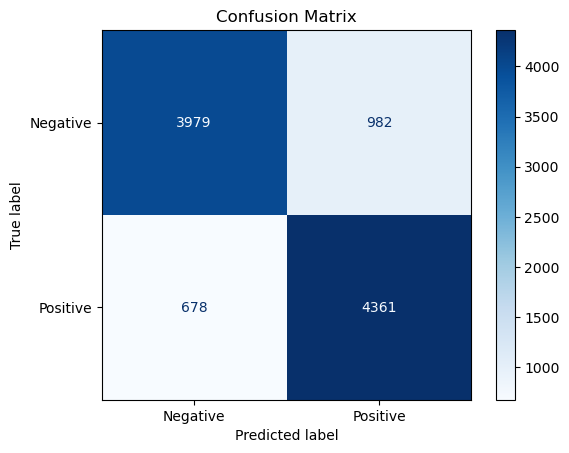

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()


In [61]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'sentiment_model_tfidf.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [63]:
# Transform test data using the vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Predict sentiment on test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Accuracy: 0.83

Classification Report:

              precision    recall  f1-score   support

    Negative       0.85      0.80      0.83      4961
    Positive       0.82      0.87      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [65]:
# Identify misclassified samples
misclassified = X_test[y_test != y_pred]

# Display a few misclassified examples
print("\nMisclassified Examples:\n")
for text, true_label, pred_label in zip(misclassified[:5], y_test[y_test != y_pred][:5], y_pred[y_test != y_pred][:5]):
    sentiment_true = 'Positive' if true_label == 1 else 'Negative'
    sentiment_pred = 'Positive' if pred_label == 1 else 'Negative'
    print(f"Text: {text}")
    print(f"True Sentiment: {sentiment_true} → Predicted Sentiment: {sentiment_pred}\n")


Misclassified Examples:

Text: I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshri

In [71]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solver type
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit on the training data
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Update the model with best parameters
best_model = grid_search.best_estimator_

C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Score: 0.8632


In [79]:
# Take a sample of 5 reviews from the test set
sample_reviews = X_test[:10]
sample_reviews

33553    I really liked this Summerslam due to the look...
9427     Not many television shows appeal to quite as m...
199      The film quickly gets to a major chase scene w...
12447    Jane Austen would definitely approve of this o...
39489    Expectations were somewhat high for me when I ...
42724    I've watched this movie on a fairly regular ba...
10822    For once a story of hope highlighted over the ...
49498    Okay, I didn't get the Purgatory thing the fir...
4144     I was very disappointed with this series. It h...
36958    The first 30 minutes of Tinseltown had my fing...
Name: review, dtype: object

In [81]:
# Transform using the loaded vectorizer
sample_reviews_tfidf = loaded_vectorizer.transform(sample_reviews)

# Predict sentiment
sample_predictions = loaded_model.predict(sample_reviews_tfidf)

# Display results
for review, pred in zip(sample_reviews, sample_predictions):
    sentiment = 'Positive' if pred == 1 else 'Negative'
    print(f"Review: \"{review}\"\nPredicted Sentiment: {sentiment}\n{'-'*50}")

Review: "I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna def